# Data Wrangling Capstone 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [2]:
from ydata_profiling import ProfileReport

The first data set is the 2015 census data from https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data?select=acs2015_county_data.csv. The data set is of counties across the united states.


Column Metadeta and relevant information for the 2015 County Data copied from https://rstudio-pubs-static.s3.amazonaws.com/352906_b6f719f938134f76bccb099ae1b89ed6.html

CensusTract Census tract ID State State, DC, or Puerto Rico 
County County or county equivalent 
TotalPop Total population 
Men Number of men 
Women Number of women
Hispanic percent of population that is Hispanic/Latino
White percent of population that is white
Black percent of population that is black
Native percent of population that is Native American or Native Alaskan
Asian percent of population that is Asian
Pacific percent of population that is Native Hawaiian or Pacific Islander
Citizen Number of citizens
Income Median household income
IncomeErr Median household income error
IncomePerCap Income per capita
IncomePerCapErr Income per capita error
Poverty percent under poverty level
ChildPoverty percent of children under poverty level
Professional percent employed in management, business, science, and arts
Service percent employed in service jobs
Office percent employed in sales and office jobs
Construction percent employed in natural resources, construction, and maintenance
Production percent employed in production, transportation, and material movement
Drive percent commuting alone in a car, van, or truck Carpool percent
carpooling in a car, van, or truck
Transit percent commuting on public transportation 
Walk percent walking to work
OtherTransp percent commuting via other means
WorkAtHome percent working at home
MeanCommute Mean commute time (minutes)
Employed percent employed (16+)
PrivateWork percent employed in private industry
PublicWork percent employed in public jobs
SelfEmployed percent self-employed
FamilyWork percent in unpaid family work
Unemployment Unemployment rate (percent)


In [3]:
df15 = pd.read_csv('acs2015_county_data.csv')
print(df15.head())
df15.info()

   CensusId    State   County  TotalPop    Men  Women  Hispanic  White  Black  \
0      1001  Alabama  Autauga     55221  26745  28476       2.6   75.8   18.5   
1      1003  Alabama  Baldwin    195121  95314  99807       4.5   83.1    9.5   
2      1005  Alabama  Barbour     26932  14497  12435       4.6   46.2   46.7   
3      1007  Alabama     Bibb     22604  12073  10531       2.2   74.5   21.4   
4      1009  Alabama   Blount     57710  28512  29198       8.6   87.9    1.5   

   Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0     0.4  ...   0.5          1.3         1.8         26.5     23986   
1     0.6  ...   1.0          1.4         3.9         26.4     85953   
2     0.2  ...   1.8          1.5         1.6         24.1      8597   
3     0.4  ...   0.6          1.5         0.7         28.8      8294   
4     0.3  ...   0.9          0.4         2.3         34.9     22189   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0         7

We see in the census county data there are 3220 non nul values. We are going to merge this data set with teh next data set we are about to discuss.

This next data set is education data for a number of counties across the United States. 

In [4]:
dfe15 = pd.read_csv('2015 Education Data.csv')


In [5]:
county_s = dfe15['County']
county_s[0]

'Baldwin County'

An important thing to notice about the two data sets is that in the first data set the county names don't include "County" in them. We spend the next several cells making sure we can remove the " County" part of the strings for the couny columns we're gonig to merege the data on.

In [6]:
position = county_s[0].find(' County')
position

7

In [7]:
a = county_s[0][0:position]
a

'Baldwin'

In [8]:
for i in range(len(county_s)):
    position = 0
    position = county_s[i].find(' County')
    if position > 1:
        county_s[i] = county_s[i][0:position]
    
county_s

C:\Users\Josh\AppData\Local\Temp\ipykernel_11120\711487662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_s[i] = county_s[i][0:position]


0                      Baldwin
1                      Calhoun
2                      Cullman
3                       DeKalb
4                       Elmore
                ...           
825            Ponce Municipio
826         San Juan Municipio
827         Toa Alta Municipio
828         Toa Baja Municipio
829    Trujillo Alto Municipio
Name: County, Length: 830, dtype: object

In [9]:
dfe15['County'] = county_s
dfe15

,County,State,Female high school graduate or higher,Female Percent bachelor's degree or higher,Male Percent high school graduate or higher,Male Percent bachelor's degree or higher,Total Percent high school graduate or higher,Total Percent bachelor's degree or higher
0,Baldwin,Alabama,0.921,0.314,0.894,0.275,0.908,0.295
1,Calhoun,Alabama,0.824,0.173,0.816,0.173,0.820,0.173
2,Cullman,Alabama,0.810,0.121,0.840,0.135,0.825,0.128
3,DeKalb,Alabama,0.716,0.110,0.668,0.090,0.693,0.100
4,Elmore,Alabama,0.881,0.209,0.793,0.206,0.840,0.207
...,...,...,...,...,...,...,...,...
825,Ponce Municipio,Puerto Rico,0.783,0.268,0.781,0.222,0.782,0.247
826,San Juan Municipio,Puerto Rico,0.790,0.342,0.757,0.310,0.775,0.328
827,Toa Alta Municipio,Puerto Rico,0.845,0.407,0.809,0.247,0.828,0.332
828,Toa Baja Municipio,Puerto Rico,0.832,0.315,0.785,0.217,0.811,0.270


In [10]:
dfe15['County'][0] == df15['County'][1]

True

In [11]:
print(dfe15.info())
print(df15.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   County                                        830 non-null    object 
 1   State                                         830 non-null    object 
 2   Female high school graduate or higher         830 non-null    float64
 3   Female Percent bachelor's degree or higher    830 non-null    float64
 4   Male Percent high school graduate or higher   830 non-null    float64
 5   Male Percent bachelor's degree or higher      830 non-null    float64
 6   Total Percent high school graduate or higher  830 non-null    float64
 7   Total Percent bachelor's degree or higher     830 non-null    float64
dtypes: float64(6), object(2)
memory usage: 52.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (

In [12]:
type(df15['County'][0])

str

In [13]:
type(dfe15['County'][0])

str

In [14]:
type(df15['State'][0])

str

In [15]:
type(dfe15['State'][0])

str

In [16]:
print(dfe15['State'][0] == df15['State'][0])

False


In [17]:
print(dfe15['State'][0])
print(df15['State'][0])

 Alabama
Alabama


the cell above this one is where I realized that when I split the data in the first data set the state column strings were left with a leading space. The following cell will remove that space.

In [18]:
states = dfe15['State']

for i in range(len(states)):
    states[i] = states[i][1:]
    
print(states[0])
print(df15['State'][0])

Alabama
Alabama


C:\Users\Josh\AppData\Local\Temp\ipykernel_11120\3990768506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states[i] = states[i][1:]


In [19]:
dfe15['States'] = states

In [20]:
ndf = pd.merge(dfe15, df15, on=['County', 'State'], how='inner')

In [21]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 801
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   County                                        802 non-null    object 
 1   State                                         802 non-null    object 
 2   Female high school graduate or higher         802 non-null    float64
 3   Female Percent bachelor's degree or higher    802 non-null    float64
 4   Male Percent high school graduate or higher   802 non-null    float64
 5   Male Percent bachelor's degree or higher      802 non-null    float64
 6   Total Percent high school graduate or higher  802 non-null    float64
 7   Total Percent bachelor's degree or higher     802 non-null    float64
 8   States                                        802 non-null    object 
 9   CensusId                                      802 non-null    int

In [22]:
ndf.to_csv('merged data.csv')

First thing we're going to do now that we have the data merged into one Data Frame is to check to see if we have any null data.

In [23]:
missing = pd.concat([ndf.isnull().sum(), 100 * ndf.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.groupby(by='count')
print(missing)

                                              count    %
County                                            0  0.0
State                                             0  0.0
Female high school graduate or higher             0  0.0
Female Percent bachelor's degree or higher        0  0.0
Male Percent high school graduate or higher       0  0.0
Male Percent bachelor's degree or higher          0  0.0
Total Percent high school graduate or higher      0  0.0
Total Percent bachelor's degree or higher         0  0.0
States                                            0  0.0
CensusId                                          0  0.0
TotalPop                                          0  0.0
Men                                               0  0.0
Women                                             0  0.0
Hispanic                                          0  0.0
White                                             0  0.0
Black                                             0  0.0
Native                         

Having no null data the next thing we can look for is duplications.

In [24]:
ndf['County'].value_counts()

Washington     9
Jefferson      9
Montgomery     7
Madison        7
Lake           5
              ..
Shawnee        1
Sedgwick       1
Riley          1
Leavenworth    1
Natrona        1
Name: County, Length: 634, dtype: int64

In [25]:
print(ndf.loc[ndf['County'] == 'Washington'])

         County         State  Female high school graduate or higher  \
43   Washington      Arkansas                                  0.855   
293  Washington      Maryland                                  0.887   
349  Washington     Minnesota                                  0.963   
572  Washington        Oregon                                  0.907   
611  Washington  Pennsylvania                                  0.925   
617  Washington  Rhode Island                                  0.961   
658  Washington     Tennessee                                  0.910   
718  Washington          Utah                                  0.917   
796  Washington     Wisconsin                                  0.947   

     Female Percent bachelor's degree or higher  \
43                                        0.326   
293                                       0.232   
349                                       0.437   
572                                       0.407   
611                     

In [26]:
print(ndf.loc[ndf['County'] == 'Jefferson'])

        County      State  Female high school graduate or higher  \
7    Jefferson    Alabama                                  0.900   
38   Jefferson   Arkansas                                  0.876   
92   Jefferson   Colorado                                  0.947   
268  Jefferson   Kentucky                                  0.907   
372  Jefferson   Missouri                                  0.883   
436  Jefferson   New York                                  0.919   
526  Jefferson       Ohio                                  0.899   
688  Jefferson      Texas                                  0.853   
782  Jefferson  Wisconsin                                  0.919   

     Female Percent bachelor's degree or higher  \
7                                         0.319   
38                                        0.193   
92                                        0.437   
268                                       0.337   
372                                       0.208   
436          

Running through the two most common counties shows no duplicates. and combined with all the census IDs are unique we can safely assume there are no duplicate columns.

Text(0.5, 0, 'count')

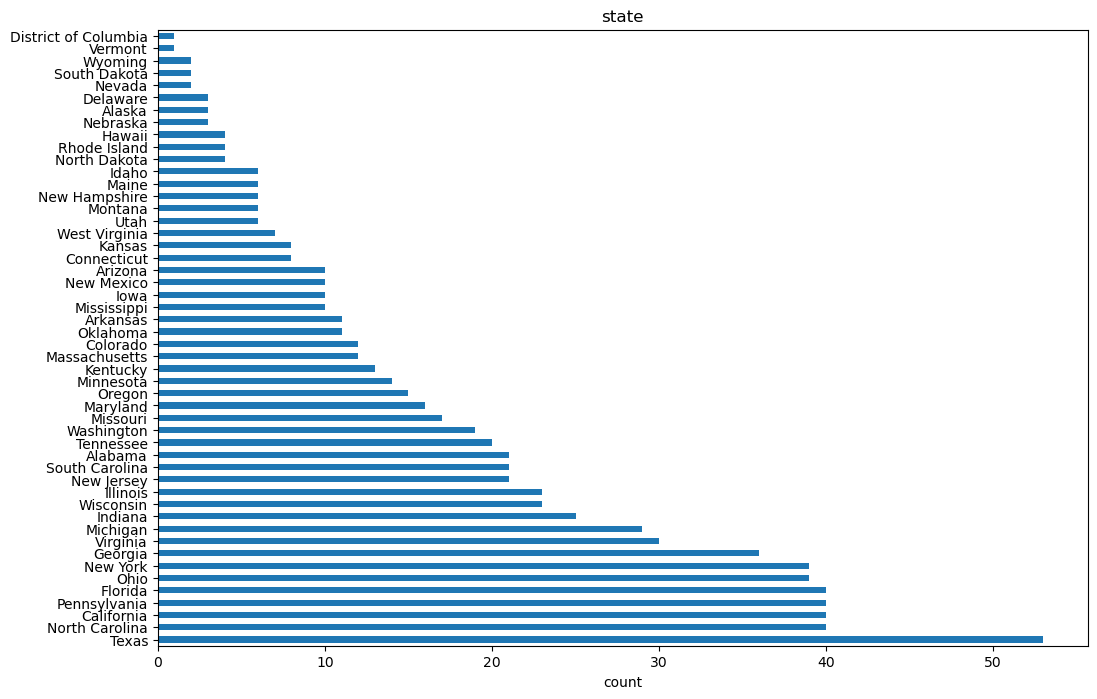

In [27]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ndf.State.value_counts().plot(kind='barh')
#Give the plot a helpful title of 'state'
ax.set_title('state')
#Label the xaxis 'Count'
ax.set_xlabel('count')
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

The counties are distributed across the states about how you would expect, with the alrger states having the most and smaller states having the least. No one state has such a majority of the counties as to skew the data on its own. An important factor to keep in mind that the USA is large with a great amount of diversity.

<AxesSubplot:xlabel='Income', ylabel='State'>

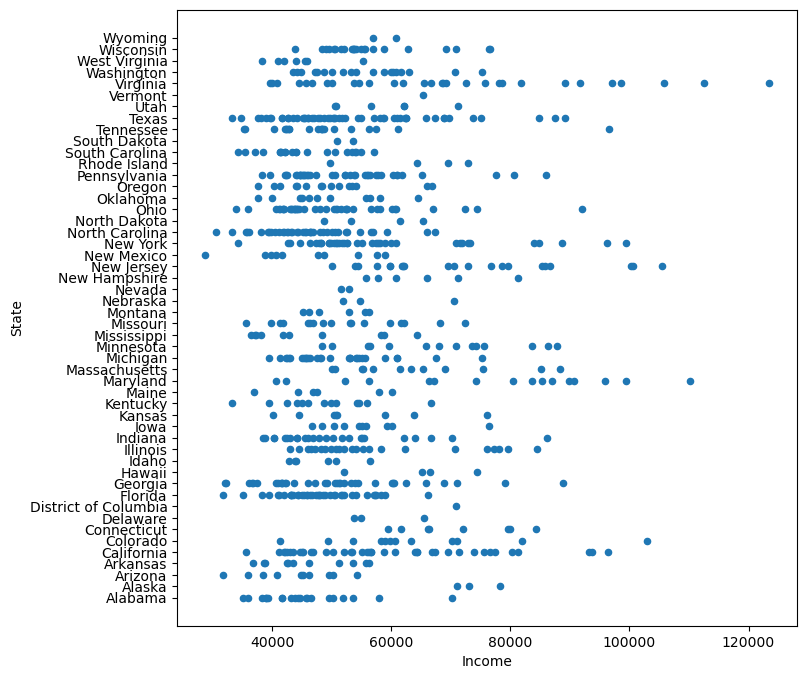

In [28]:
ndf.plot.scatter(x='Income', y='State', figsize=(8,8))

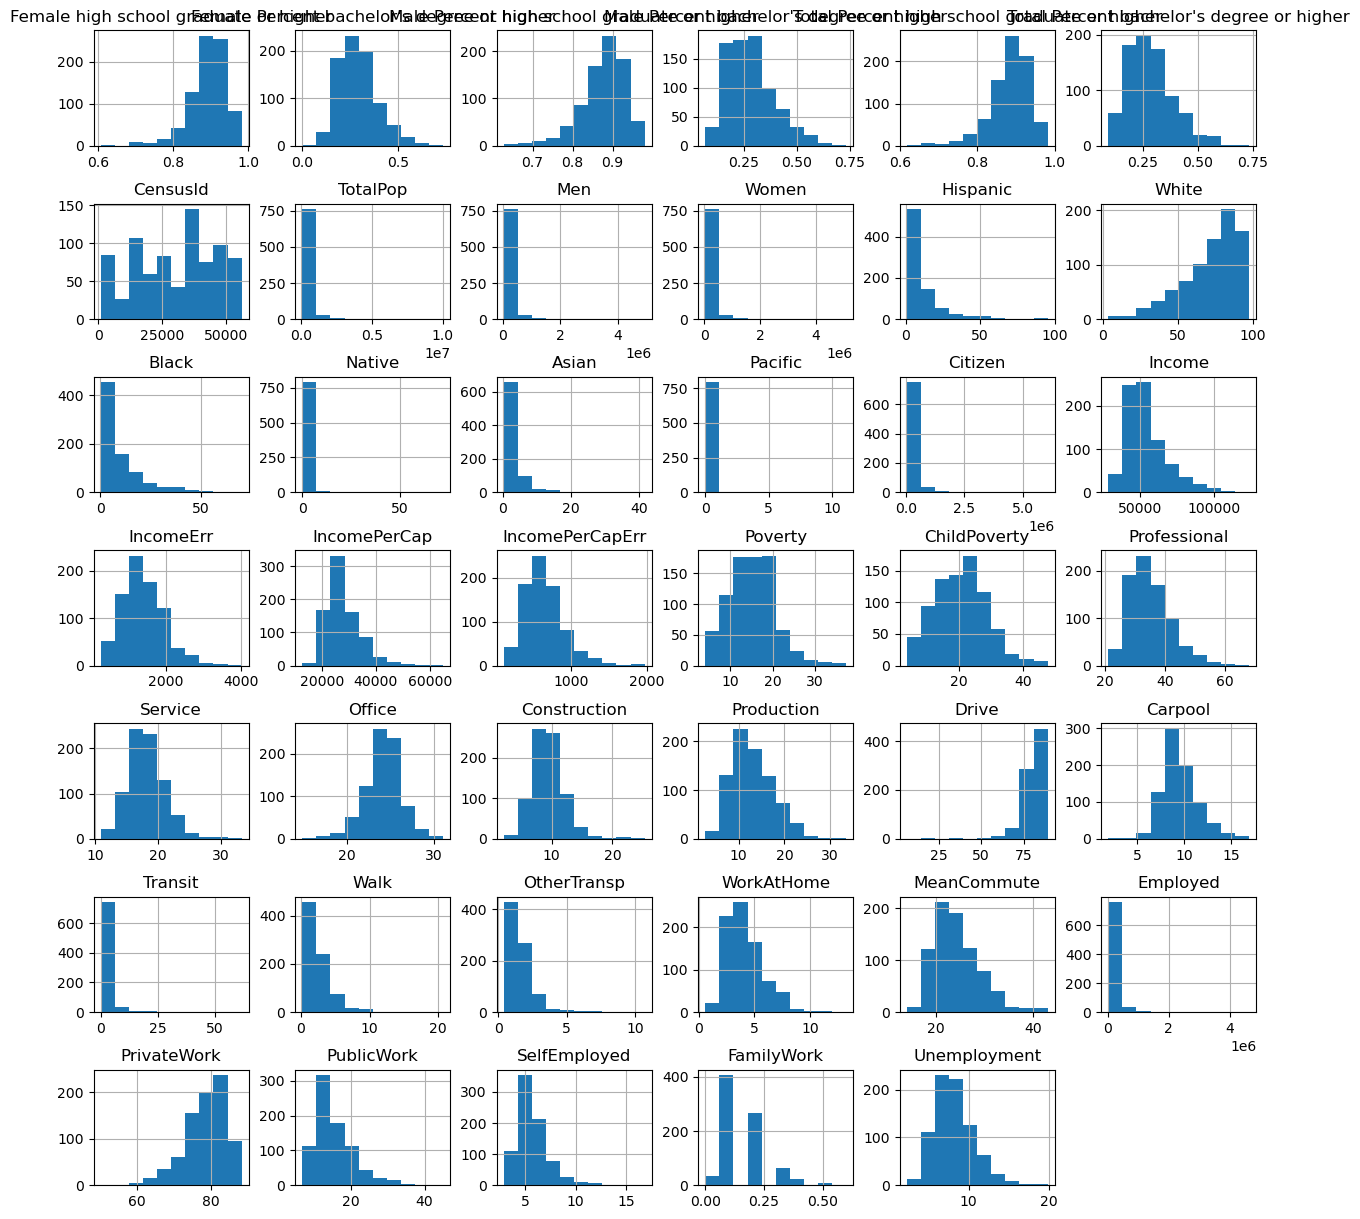

In [29]:
ndf.hist(figsize=(15,15))
plt.subplots_adjust(hspace=.5);

The graphs here show the the data is for the most part evenly distributed. Much of the data is skewed left or right. In this particular grouping of the plots, the eduction plot titles are running over each other. We can and will rename those columns to be more in line with the rest of the columns.

array([[<AxesSubplot:title={'center':"Female Percent bachelor's degree or higher"}>]],
      dtype=object)

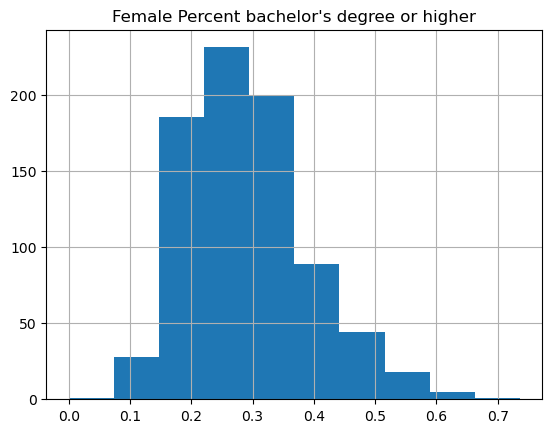

In [30]:
ndf.hist(column='Female Percent bachelor\'s degree or higher')

We are going to change the education column titles in the following ways: 
                    Female Percent bachelor's degree or higher   -> F4YrDegree
                    Male Percent bachelor's degree or higher     -> M4YrDegree
                    Female high school graduate or higher        -> FHSDiploma
                    Male Percent high school graduate or higher  -> MHSDiploma
                    Total Percent high school graduate or higher -> TPHSDiploma
                    Total Percent bachelor's degree or higher    -> TPBDegree

In [53]:
ndf.rename(columns={'Female Percent bachelor\'s degree or higher': 'F4YrDegree',
                    'Male Percent bachelor\'s degree or higher': 'M4YrDegree',
                    'Female high school graduate or higher': 'FHSDiploma',
                    'Male Percent high school graduate or higher': 'MHSDiploma',
                    'Total Percent high school graduate or higher': 'TPHSDiploma',
                    'Total Percent bachelor\'s degree or higher': 'TPBDegree'}, inplace=True)



<AxesSubplot:ylabel='Income'>

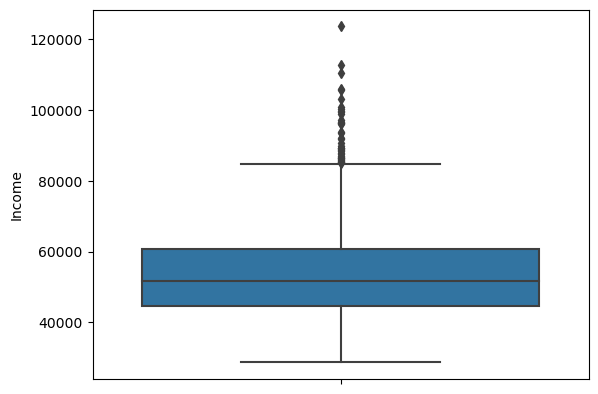

In [54]:
sns.boxplot(y=ndf["Income"])

In [55]:
quartiles = ndf['Income'].quantile([.25, .75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

16080.25


In [56]:
incomeMin = ndf['Income'].min()
print(incomeMin)

28772.0


In [57]:
incomeMin + iqr*4

93093.0

In [58]:
ndf['Income'].quantile([.75])

0.75    60661.25
Name: Income, dtype: float64

In [59]:
outlierThresh = ndf['Income'].quantile([.75]) + iqr * 1.5
print(outlierThresh)

0.75    84781.625
Name: Income, dtype: float64


In [60]:
outdf = ndf.loc[ndf['Income'] > outlierThresh[.75]]
outdf['Income']

57      93257.0
72      93623.0
74      96310.0
90     102964.0
167     88816.0
225     86222.0
281     89860.0
283     95828.0
284     85385.0
286     90607.0
289    110238.0
290     99435.0
292     86987.0
303     85118.0
304     88262.0
339     86323.0
346     87794.0
396     85806.0
404    105444.0
407     85242.0
408    100214.0
412    100667.0
413     86565.0
441     99465.0
449     96148.0
453     84855.0
458     88663.0
518     91955.0
585     85976.0
659     96565.0
677     89152.0
702     87524.0
722    105763.0
726    112552.0
727     91609.0
732    123453.0
734     98657.0
738     97144.0
740     89134.0
Name: Income, dtype: float64

In [61]:
outdf.reset_index(drop=True, inplace=True)

In [62]:
outdf

,County,State,FHSDiploma,F4YrDegree,MHSDiploma,M4YrDegree,TPHSDiploma,TPBDegree,States,CensusId,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Marin,California,0.940,0.596,0.905,0.582,0.924,0.589,California,6041,...,3.2,2.6,10.1,30.2,129027,73.8,10.8,15.4,0.1,5.7
1,San Mateo,California,0.880,0.473,0.879,0.469,0.879,0.471,California,6081,...,2.5,2.6,5.0,26.8,387006,79.8,11.7,8.3,0.2,6.7
2,Santa Clara,California,0.867,0.479,0.880,0.512,0.873,0.495,California,6085,...,2.0,3.2,4.6,26.3,915619,84.3,9.3,6.4,0.1,7.7
3,Douglas,Colorado,0.983,0.527,0.980,0.596,0.982,0.561,Colorado,8035,...,0.9,1.3,10.1,27.7,159911,82.9,11.9,5.1,0.1,4.1
4,Forsyth,Georgia,0.927,0.460,0.920,0.506,0.924,0.482,Georgia,13117,...,0.7,1.0,9.3,30.9,92504,84.1,9.6,6.2,0.1,6.2
5,Hamilton,Indiana,0.956,0.532,0.962,0.590,0.958,0.559,Indiana,18057,...,0.7,0.9,6.2,26.6,154190,84.9,10.5,4.4,0.1,4.3
6,Anne Arundel,Maryland,0.917,0.392,0.916,0.396,0.917,0.394,Maryland,24003,...,2.2,1.4,4.8,29.7,284092,71.6,24.0,4.3,0.2,5.9
7,Calvert,Maryland,0.958,0.338,0.952,0.262,0.955,0.301,Maryland,24009,...,1.0,0.9,4.3,40.1,45249,68.4,27.5,4.0,0.1,7.6
8,Carroll,Maryland,0.933,0.365,0.898,0.354,0.916,0.360,Maryland,24013,...,1.2,0.6,4.5,35.2,88196,76.3,18.2,5.4,0.0,4.6
9,Charles,Maryland,0.959,0.295,0.913,0.258,0.938,0.278,Maryland,24017,...,1.1,0.7,3.3,42.8,76622,64.3,32.6,2.9,0.2,6.3


There are 39 rows in which Income has outlier values.

<AxesSubplot:ylabel='TPBDegree'>

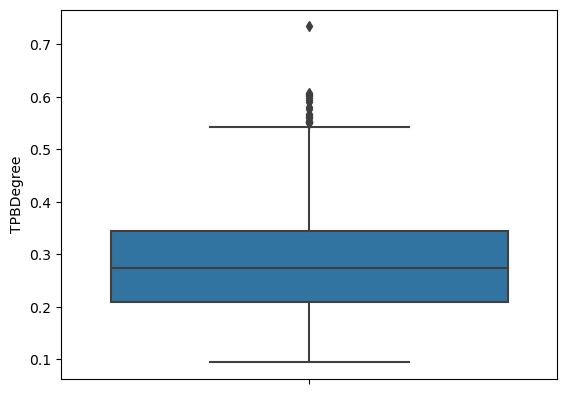

In [63]:
sns.boxplot(y=ndf['TPBDegree'])

In [64]:
quartiles = ndf['TPBDegree'].quantile([.25, .75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

0.13575


In [66]:
outlierThresh = ndf['TPBDegree'].quantile([.75]) + iqr * 1.5
print(outlierThresh)

0.75    0.548375
Name: TPBDegree, dtype: float64


In [68]:
degreeOutdf = ndf.loc[ndf['TPBDegree'] > outlierThresh[.75]]
degreeOutdf

,County,State,FHSDiploma,F4YrDegree,MHSDiploma,M4YrDegree,TPHSDiploma,TPBDegree,States,CensusId,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
57,Marin,California,0.940,0.596,0.905,0.582,0.924,0.589,California,6041,...,3.2,2.6,10.1,30.2,129027,73.8,10.8,15.4,0.1,5.7
69,San Francisco,California,0.860,0.555,0.891,0.549,0.876,0.552,California,6075,...,10.4,6.5,6.9,31.7,478373,79.9,11.3,8.7,0.1,6.8
87,Boulder,Colorado,0.947,0.600,0.945,0.612,0.946,0.606,Colorado,8013,...,5.0,5.7,11.1,22.5,166701,78.0,13.4,8.5,0.2,6.1
88,Broomfield,Colorado,0.983,0.586,0.955,0.535,0.970,0.561,Colorado,8014,...,1.0,1.7,7.6,28.3,31807,79.9,13.8,6.0,0.2,5.5
90,Douglas,Colorado,0.983,0.527,0.980,0.596,0.982,0.561,Colorado,8035,...,0.9,1.3,10.1,27.7,159911,82.9,11.9,5.1,0.1,4.1
108,District of Columbia,District of Columbia,0.904,0.551,0.892,0.586,0.898,0.567,District of Columbia,11001,...,12.9,5.2,5.0,29.7,337815,70.0,25.4,4.4,0.1,9.6
225,Hamilton,Indiana,0.956,0.532,0.962,0.590,0.958,0.559,Indiana,18057,...,0.7,0.9,6.2,26.6,154190,84.9,10.5,4.4,0.1,4.3
255,Johnson,Kansas,0.968,0.541,0.958,0.569,0.963,0.554,Kansas,20091,...,0.8,0.8,5.4,21.0,302532,83.8,10.9,5.2,0.1,4.5
289,Howard,Maryland,0.952,0.588,0.952,0.620,0.952,0.604,Maryland,24027,...,1.0,1.0,5.5,30.5,163278,71.9,23.3,4.6,0.1,4.9
290,Montgomery,Maryland,0.897,0.564,0.901,0.599,0.899,0.580,Maryland,24031,...,2.1,1.3,5.6,34.5,540333,71.8,21.7,6.4,0.1,6.1


Given what I know of causes of higher income in the United states I'm checking to see how much the outliers on income line up with outliers on education in terms of total degree percentage to see how much that may be skewing our data.

In [69]:
mergedOutdf = pd.merge(outdf, degreeOutdf, on=['County', 'State'], how='inner')
mergedOutdf

,County,State,FHSDiploma_x,F4YrDegree_x,MHSDiploma_x,M4YrDegree_x,TPHSDiploma_x,TPBDegree_x,States_x,CensusId_x,...,Walk_y,OtherTransp_y,WorkAtHome_y,MeanCommute_y,Employed_y,PrivateWork_y,PublicWork_y,SelfEmployed_y,FamilyWork_y,Unemployment_y
0,Marin,California,0.940,0.596,0.905,0.582,0.924,0.589,California,6041,...,3.2,2.6,10.1,30.2,129027,73.8,10.8,15.4,0.1,5.7
1,Douglas,Colorado,0.983,0.527,0.980,0.596,0.982,0.561,Colorado,8035,...,0.9,1.3,10.1,27.7,159911,82.9,11.9,5.1,0.1,4.1
2,Hamilton,Indiana,0.956,0.532,0.962,0.590,0.958,0.559,Indiana,18057,...,0.7,0.9,6.2,26.6,154190,84.9,10.5,4.4,0.1,4.3
3,Howard,Maryland,0.952,0.588,0.952,0.620,0.952,0.604,Maryland,24027,...,1.0,1.0,5.5,30.5,163278,71.9,23.3,4.6,0.1,4.9
4,Montgomery,Maryland,0.897,0.564,0.901,0.599,0.899,0.580,Maryland,24031,...,2.1,1.3,5.6,34.5,540333,71.8,21.7,6.4,0.1,6.1
5,Williamson,Tennessee,0.958,0.558,0.965,0.597,0.961,0.576,Tennessee,47187,...,0.9,1.1,9.0,27.1,97869,80.3,10.5,9.0,0.2,4.2
6,Arlington,Virginia,0.929,0.736,0.922,0.732,0.926,0.734,Virginia,51013,...,4.9,2.7,5.8,28.1,141305,70.2,25.4,4.3,0.1,3.7
7,Fairfax,Virginia,0.922,0.566,0.919,0.624,0.920,0.594,Virginia,51059,...,1.8,1.5,5.8,32.0,603966,72.9,21.5,5.4,0.1,4.9
8,Loudoun,Virginia,0.939,0.580,0.937,0.625,0.938,0.602,Virginia,51107,...,1.7,1.0,6.8,33.0,186474,78.5,16.9,4.5,0.1,4.0
9,Alexandria city,Virginia,0.915,0.606,0.925,0.589,0.920,0.598,Virginia,51510,...,3.6,2.5,5.0,30.8,92575,70.0,25.3,4.7,0.0,4.5


Less than a quarter of income outliers are also outliers in terms of education.

<AxesSubplot:ylabel='White'>

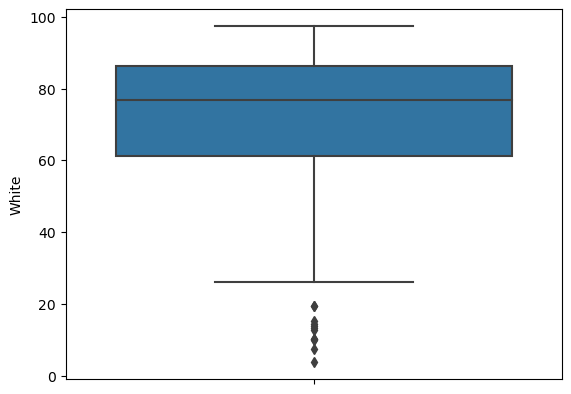

In [70]:
sns.boxplot(y=ndf['White'])

In [72]:
quartiles = ndf['White'].quantile([.25, .75])
iqr = quartiles[0.75] - quartiles[0.25]
outlierThresh = ndf['White'].quantile([.75])
print(outlierThresh)

0.75    86.3
Name: White, dtype: float64


In [73]:
whitedf = ndf.loc[ndf['White'] > outlierThresh[.75]]
whitedf

,County,State,FHSDiploma,F4YrDegree,MHSDiploma,M4YrDegree,TPHSDiploma,TPBDegree,States,CensusId,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2,Cullman,Alabama,0.810,0.121,0.840,0.135,0.825,0.128,Alabama,1043,...,1.5,1.0,2.6,26.4,32282,81.6,12.2,5.8,0.4,7.3
20,Walker,Alabama,0.853,0.116,0.790,0.069,0.823,0.094,Alabama,1127,...,0.9,1.0,1.3,30.0,24043,78.3,15.3,6.2,0.2,11.4
39,Lonoke,Arkansas,0.879,0.214,0.878,0.217,0.879,0.215,Arkansas,5085,...,1.5,0.9,2.5,26.5,31944,76.8,18.0,5.1,0.2,5.9
41,Saline,Arkansas,0.886,0.234,0.906,0.267,0.896,0.250,Arkansas,5125,...,0.7,0.8,2.7,25.5,53363,76.4,18.4,5.0,0.2,5.3
44,White,Arkansas,0.848,0.220,0.794,0.141,0.821,0.182,Arkansas,5145,...,2.8,0.6,3.3,23.1,32318,79.2,14.7,5.7,0.4,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Washington,Wisconsin,0.947,0.282,0.938,0.296,0.942,0.289,Wisconsin,55131,...,1.7,1.4,3.2,24.7,72365,87.7,8.2,4.1,0.1,4.5
797,Waukesha,Wisconsin,0.962,0.422,0.961,0.427,0.961,0.424,Wisconsin,55133,...,1.3,0.9,4.2,24.0,209461,87.4,8.3,4.2,0.1,4.2
798,Winnebago,Wisconsin,0.930,0.270,0.902,0.243,0.916,0.256,Wisconsin,55139,...,2.4,1.3,3.0,18.6,85970,84.9,11.4,3.6,0.1,4.7
799,Wood,Wisconsin,0.955,0.216,0.918,0.226,0.937,0.221,Wisconsin,55141,...,4.1,1.9,3.6,18.9,36445,83.5,10.8,5.5,0.2,6.6


In [78]:
mergedOutdf = pd.merge(outdf, whitedf, on=['County', "State"], how='inner', suffixes=('', '_y'))
mergedOutdf.drop(mergedOutdf.filter(regex='_y$').columns, axis=1, inplace=True)
mergedOutdf

,County,State,FHSDiploma,F4YrDegree,MHSDiploma,M4YrDegree,TPHSDiploma,TPBDegree,States,CensusId,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Carroll,Maryland,0.933,0.365,0.898,0.354,0.916,0.360,Maryland,24013,...,1.2,0.6,4.5,35.2,88196,76.3,18.2,5.4,0.0,4.6
1,Carver,Minnesota,0.950,0.431,0.956,0.460,0.953,0.445,Minnesota,27019,...,1.3,0.9,6.9,25.6,52573,84.7,9.6,5.5,0.2,3.8
2,Hunterdon,New Jersey,0.944,0.497,0.939,0.508,0.942,0.502,New Jersey,34019,...,1.8,0.7,7.6,32.9,65918,79.6,13.6,6.6,0.1,5.9
3,Sussex,New Jersey,0.960,0.360,0.934,0.355,0.947,0.358,New Jersey,34037,...,1.1,1.0,5.4,38.1,75669,78.8,14.3,6.7,0.1,8.2
4,Delaware,Ohio,0.968,0.531,0.973,0.553,0.970,0.542,Ohio,39041,...,1.0,0.8,6.8,25.9,94424,80.0,14.2,5.7,0.1,3.2


Given what I know of America's history I also suspected that race may have correlated with the income outliers. However, only 5 of the income outliers are in the top quartile of white population percentage of the counties. For now, I see no reason to remove the income outliers from the data set and nothing unsual about them. We will explore that more in the next notebook.

Other things of note before moving on is that there are highly correlating variables in our data. Poverty is generally going to be very closely tracked by income. The plan for this project is to see if we could model and predict variables for income but the other route we could have gone was to see what variables also played a part in reducing poverty that may not necessarily also contribute to maximizing incomes.